Statistical Analysis Introduction
===============

In this Jupyter Notebook I will deepen my personal strategy used to compute a statistical analyis of the behaviour of two different codes for the first assignment of Research Track 1.The first code was developed by me, while the other one was developed my our professor Carmine Recchiuto. 

When it first came to me the assignment, I thought that it would've been nice to study one issue of the codes, the fact that they can go counter-clockwise in the arena. After many runs of both the codes I noticed that it wasn't actually a smart feature to be studied, because in about 20 runs they were never going counter-clockwise. That wasn't what I expected, because while talking with the other students I found out that it was pretty popular that the robot was going backwards. I think this comes from the fact that I'm running the code in a VM while the others on the Docker image given by the professor.
__Anyway, I then decided to compare two different features__:
1. The way the robot changes its direction.
2. The time needed to compute the task.
## How I extract the data?

__To obtain the data for the first analysis parameter__ I decided to focus on when the robot is close to a wall. I modified both the codes where the lines manage the change of direction close to a wall (therefore close to the golden tokens), simply by adding a +1 each time the running program goes in that part of the code.

__To obtain the data for the second analysis parameter__  I started to take the time as soon as the running program enters the robot movement part, which is usually the `main()` function. The code is set to take the end time when the robot finishes to grab the 8th silver token (because I added one). So as you can think it is not a real lap, but as far as the final token is not randomly placed, it makes the time a good parameter to be analyzed.
## How I placed the tokens?
In both the folders of the two programs, following the path `.../sr/robot` there's a file called `sunny_side_up_arena.py`. This file contains the creation of the map, and even the position and the number of tokens (7) in the arena. I added one more to see if it was still working and I changed the position of all others. The position is set to make the token "slide" in the direction of the tunnel, in order to not set silver tokens too close to the walls.

# Statistical Analysis Code
Now I'll develop and perform the stats code. All the code is available too in the `stats.py` script.
## Importing Libraries.

In [42]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

## Importing data from the files.

In [43]:
with open("collision.txt") as f:
    timestamp_s = f.read().splitlines() 
timestamp = list(map(float, timestamp_s))
#print(timestamp)
#print(len(timestamp))

with open("trajectory.txt") as f:
    collision_s = f.read().splitlines() 
collision = list(map(int, collision_s))
#print(collision)
#print(len(collision))

with open("collisionp.txt") as f:
    timestampp_s = f.read().splitlines() 
timestampp = list(map(float, timestampp_s))
#print(timestampp)
#rint(len(timestampp))

with open("trajectoryp.txt") as f:
    collisionp_s = f.read().splitlines() 
collisionp = list(map(int, collisionp_s))
#print(collisionp)
#print(len(collisionp))

## Computing average and standard deviation.

In [44]:
# Calculate the average
collision_mean = np.mean(collision)
timestamp_mean = np.mean(timestamp)
collisionp_mean = np.mean(collisionp)
timestampp_mean = np.mean(timestampp)

# Calculate the standard deviation
collision_std = np.std(collision)
timestamp_std = np.std(timestamp)
collisionp_std = np.std(collisionp)
timestampp_std = np.std(timestampp)

## Printing medium with standard deviation.

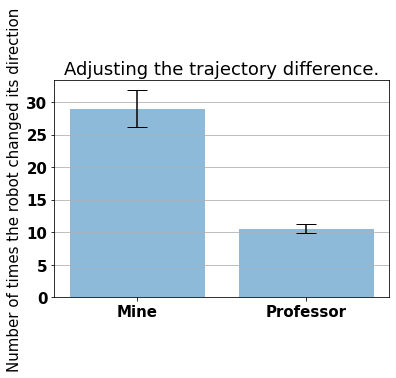

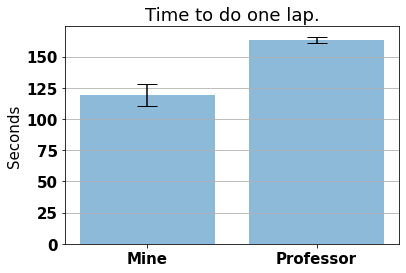

In [55]:
# Define labels, positions, bar heights and error bar heights
labels = ['Mine', 'Professor']
x_pos1 = np.arange(len(labels))
CTEs1 = [collision_mean, collisionp_mean]
error1 = [collision_std, collisionp_std]

fig1, ax1 = plt.subplots()
ax1.bar(x_pos1, CTEs1,
       yerr=error1,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax1.set_ylabel('Number of times the robot changed its direction')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(labels)
ax1.set_title('Adjusting the trajectory difference.')
ax1.yaxis.grid(True)

labels2 = ['Mine', 'Professor']
x_pos2 = np.arange(len(labels))
CTEs2 = [timestamp_mean, timestampp_mean]
error2 = [timestamp_std, timestampp_std]

fig2, ax2 = plt.subplots()
ax2.bar(x_pos2, CTEs2,
       yerr=error2,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax2.set_ylabel('Seconds')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(labels2)
ax2.set_title('Time to do one lap.')
ax2.yaxis.grid(True)

#fig1.tight_layout()
#fig2.tight_layout()
plt.show()

## Plotting the collisions values.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


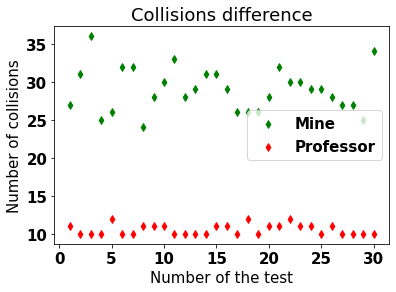

In [70]:
x=[]
for i in range(1,31):
    x.append(i)
print(x)

# plotting points as a scatter plot
plt.scatter(x, collision, label= "Mine", color= "green",
            marker= "d", s=30)

plt.scatter(x, collisionp, label= "Professor", color= "red",
            marker= "d", s=30)
 
# x-axis label
plt.xlabel('Number of the test')
# frequency label
plt.ylabel('Number of collisions')
# plot title
plt.title('Collisions difference')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()

## Plotting the time values.

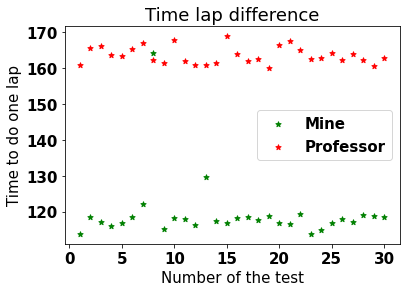

In [71]:
# plotting points as a scatter plot
plt.scatter(x, timestamp, label= "Mine", color= "green",
            marker= "*", s=30)

plt.scatter(x, timestampp, label= "Professor", color= "red",
            marker= "*", s=30)
 
# x-axis label
plt.xlabel('Number of the test')
# frequency label
plt.ylabel('Time to do one lap')
# plot title
plt.title('Time lap difference')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()

## T-test between the two groups.